## Encode the Location, Vehicles, Province_Code, Next Location

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

veri_seti = pd.read_excel("accident_news_v2.xlsx")

label_encoder = LabelEncoder()
veri_seti['Location_Encoded'] = label_encoder.fit_transform(veri_seti['Location'])

print(veri_seti[['Location', 'Location_Encoded']].head())

veri_seti['Vehicles_Encoded'] = label_encoder.fit_transform(veri_seti['Vehicles'])

print(veri_seti[['Vehicles', 'Vehicles_Encoded']].head())

veri_seti['Province_Code_Encoded'] = label_encoder.fit_transform(veri_seti['Province_Code'])

print(veri_seti[['Province_Code', 'Province_Code_Encoded']].head())

veri_seti['Next Location_Encoded'] = label_encoder.fit_transform(veri_seti['Next Location'])

print(veri_seti[['Next Location', 'Next Location_Encoded']].head())



veri_seti.to_excel("accident_news_encoded.xlsx", index=False)







    Location  Location_Encoded
0    (None,)                 0
1       Söke                14
2  Germencik                 5
3    Nazilli                12
4    Nazilli                12
                        Vehicles  Vehicles_Encoded
0                   ['otomobil']                46
1         ['kamyonet', 'kamyon']                 7
2  ['otomobil', 'kamyon', 'tır']                28
3            ['otomobil', 'tır']                45
4                             []                51
  Province_Code  Province_Code_Encoded
0  ['09', '35']                     58
1        ['09']                     76
2  ['07', '09']                     16
3  ['07', '09']                     16
4            []                    221
  Next Location  Next Location_Encoded
0          Söke                     14
1     Germencik                      5
2       Nazilli                     12
3       Nazilli                     12
4          Çine                     16


## Extract new features. Use feature engineering methods and convert datasets into tabular dataset and create features.

In [3]:
import pandas as pd

# Load the dataset with features
veri_seti = pd.read_excel("accident_news_encoded.xlsx")

# Calculate accident rates based on location
location_accident_counts = veri_seti['Location'].value_counts(normalize=True)

# Map accident rates to locations
veri_seti['Accident_Rate_By_Location'] = veri_seti['Location'].map(location_accident_counts)

# Save the updated dataset
veri_seti.to_excel("accident_news_encoded_and_added_accident_rates.xlsx", index=False)

# Display the updated dataset
print(veri_seti)


                                                    URL  \
0     https://www.aydinhedef.com.tr/aydinda-feci-kaz...   
1     https://www.aydinhedef.com.tr/aydinda-trafik-k...   
2     https://www.aydinhedef.com.tr/aydinda-trafik-k...   
3     https://www.aydinhedef.com.tr/sultanhisarda-fe...   
4     https://www.aydinhedef.com.tr/nazillide-is-kaz...   
...                                                 ...   
1576  https://www.aydinhedef.com.tr/kaza-ani-kameral...   
1577  https://www.aydinhedef.com.tr/soke-kusadasi-yo...   
1578  https://www.aydinhedef.com.tr/sokede-motosikle...   
1579  https://www.aydinhedef.com.tr/nazillide-is-kaz...   
1580  https://ajansaydin.com/incirliovada-feci-kaza-...   

                                                Content                Date  \
0     Aydın'da 2 otomobilin çarptığı yaya ağır yaral... 2019-02-01 13:08:00   
1     Aydın'ın Söke ilçesinde kamyonetin devrilmesi ... 2019-02-01 15:27:00   
2      Aydın'ın Germencik ilçesindeki trafik kazasın..

## Show standardization of each inputs and outputs

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veri setini oku
veri_seti = pd.read_excel('accident_news_encoded_and_added_accident_rates.xlsx')
# Verilerin standardizasyonunu yap
scaler = StandardScaler()
standardize_veri = scaler.fit_transform(veri_seti)

# Standardize edilmiş veriyi yeni bir DataFrame'e dönüştür
standardize_veri_df = pd.DataFrame(standardize_veri, columns=veri_seti.columns)

# Yeni Excel dosyasına kaydet
standardize_veri_df.to_excel('accident_standardize_edilmis_veri.xlsx', index=False)

print(standardize_veri_df)


      otomobil  motosiklet  kamyonet   minibüs    kamyon       tır   traktör  \
0     0.936842   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
1    -1.067416   -0.581002  3.383610 -0.241315  2.673852 -0.365148 -0.233887   
2     0.936842   -0.581002 -0.295542 -0.241315  2.673852  2.738613 -0.233887   
3     0.936842   -0.581002 -0.295542 -0.241315 -0.373992  2.738613 -0.233887   
4    -1.067416   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
...        ...         ...       ...       ...       ...       ...       ...   
1576  0.936842   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
1577 -1.067416   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
1578 -1.067416    1.721164 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
1579 -1.067416   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   
1580  0.936842   -0.581002 -0.295542 -0.241315 -0.373992 -0.365148 -0.233887   

      bisiklet  scooter  at arabası  ..

## Make plots (histograms, barhcarts, scatter, violin) that describe the behavior of input data versus output data.

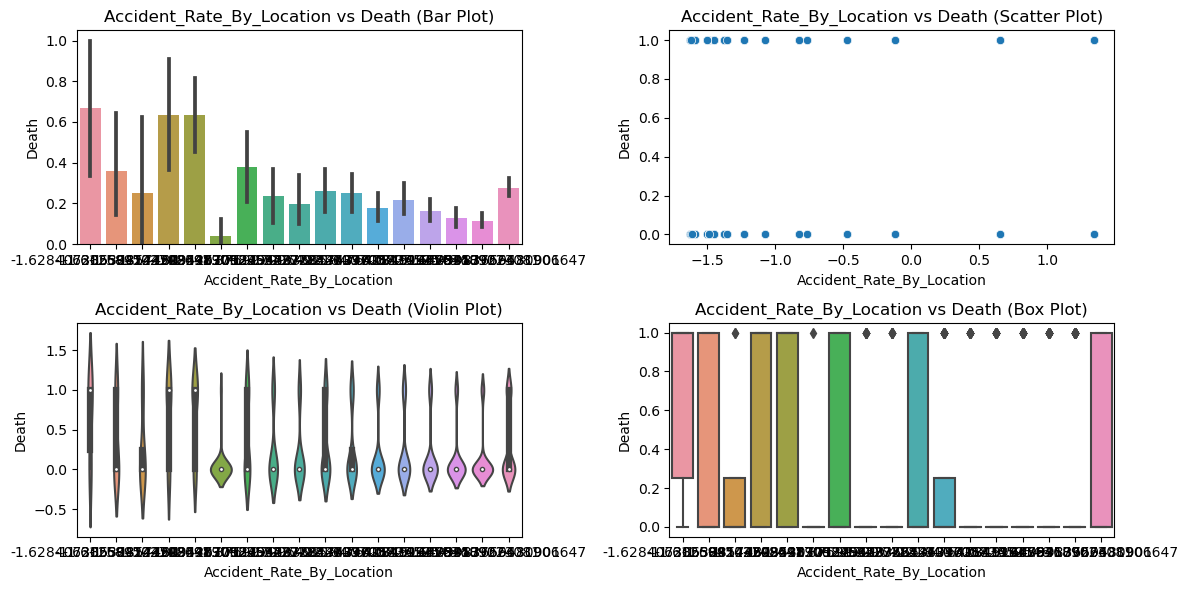

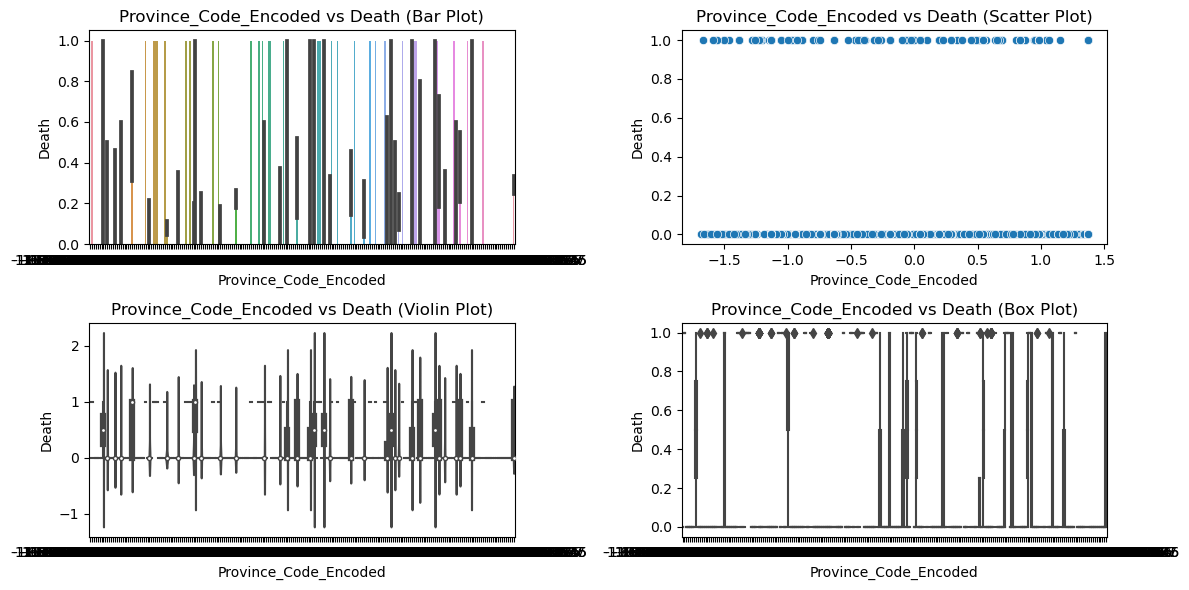

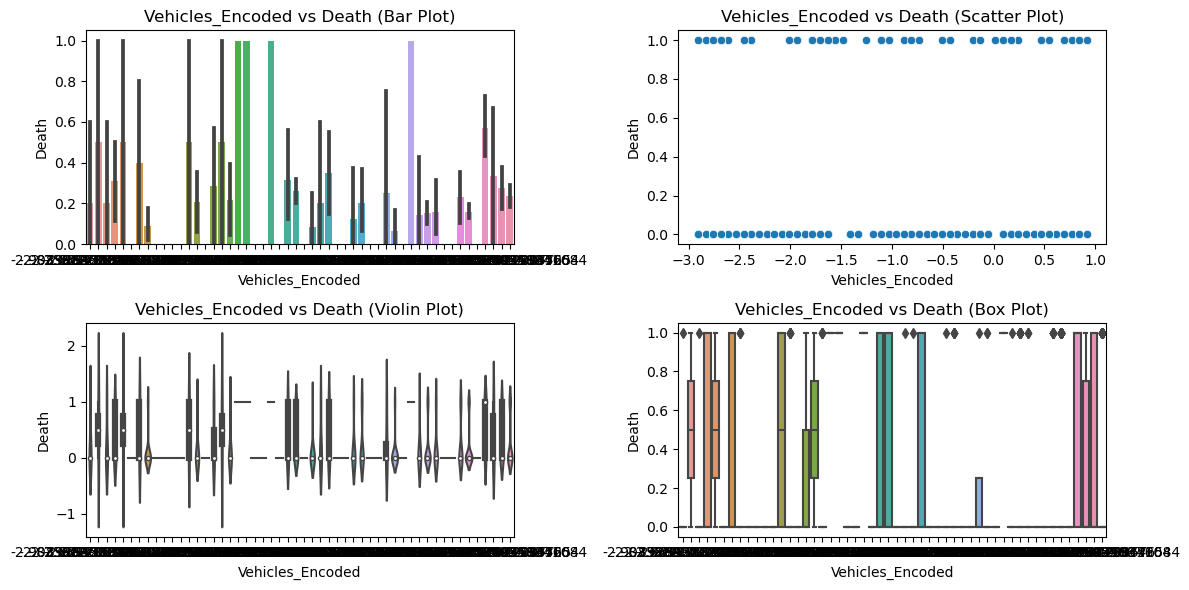

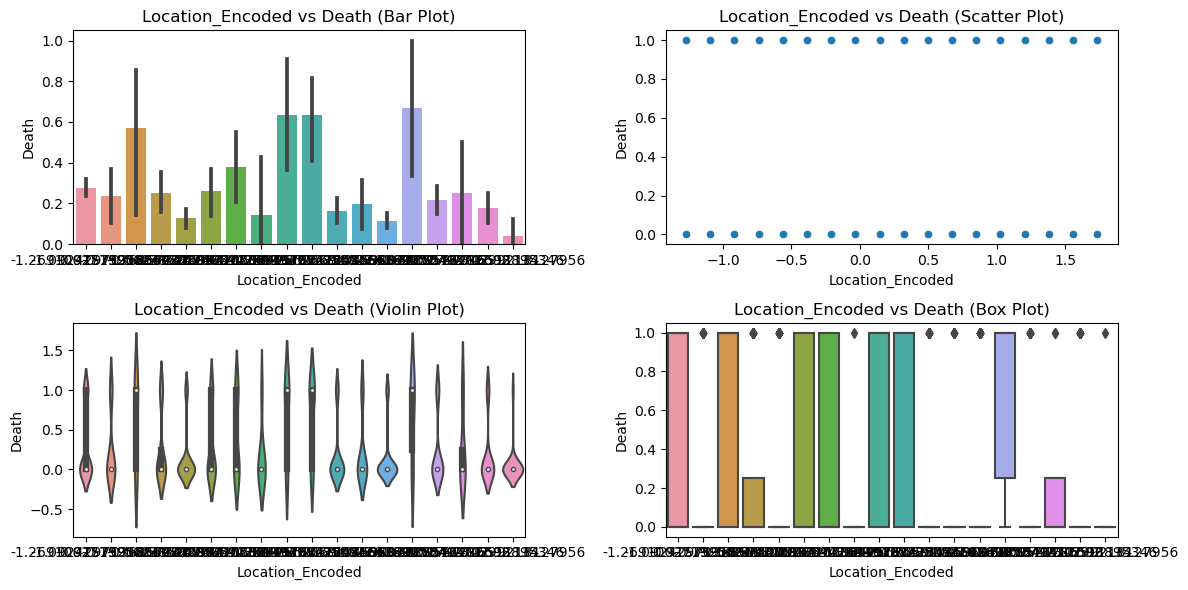

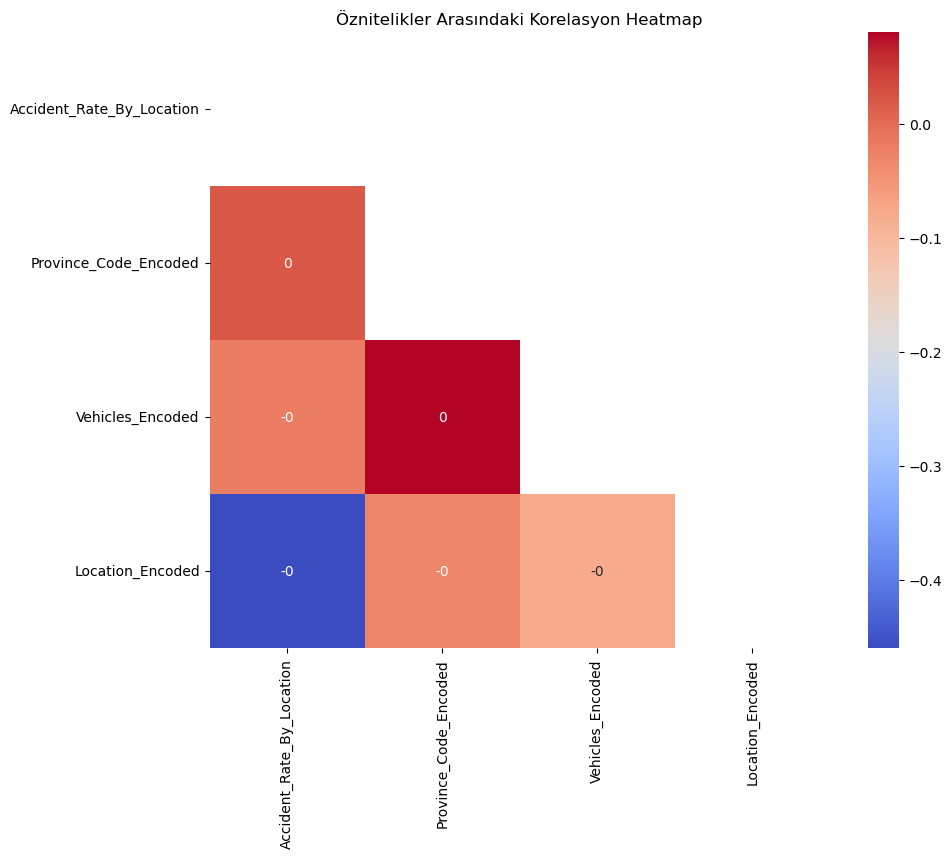

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Veri setini yükle
data = pd.read_excel("accident_news_encoded_and_added_accident_rates.xlsx")

# Öznitelikleri ve hedef değişkeni ayır
X = data[['Accident_Rate_By_Location', 'Province_Code_Encoded', 'Vehicles_Encoded','Location_Encoded']]  # Seçilen sütunlar
y = data['Death']  # Çıktı değişkeni

# Veri setini standartlaştır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standartlaştırılmış veriyi DataFrame'e dönüştür
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Her bir sütun için farklı grafik türleri ile görselleştirme
for column in X_scaled_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Bar plot
    plt.subplot(2, 2, 1)
    sns.barplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Death')
    plt.title(f'{column} vs Death (Bar Plot)')

    # Scatter plot
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Death')
    plt.title(f'{column} vs Death (Scatter Plot)')

    # Violin plot
    plt.subplot(2, 2, 3)
    sns.violinplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Death')
    plt.title(f'{column} vs Death (Violin Plot)')

    # Box plot
    plt.subplot(2, 2, 4)
    sns.boxplot(x=X_scaled_df[column], y=y)
    plt.xlabel(column)
    plt.ylabel('Death')
    plt.title(f'{column} vs Death (Box Plot)')

    plt.tight_layout()
    plt.show()

# Öznitelikler arasındaki ilişkiyi gösteren heatmap
plt.figure(figsize=(10, 8))
corr = X_scaled_df.corr().round(2)
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask, fmt=".0f")
plt.title('Öznitelikler Arasındaki Korelasyon Heatmap')
plt.show()


## Extract statistical information of each input and outputs of datasets.

In [14]:
import pandas as pd

veri = pd.read_excel('accident_standardize_edilmis_veri.xlsx')

istatistikler = veri.describe()

print(istatistikler)

           otomobil    motosiklet      kamyonet       minibüs        kamyon  \
count  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03   
mean  -9.437949e-17  3.595409e-17  8.089671e-17 -7.078462e-17 -2.247131e-18   
std    1.000316e+00  1.000316e+00  1.000316e+00  1.000316e+00  1.000316e+00   
min   -1.067416e+00 -5.810021e-01 -2.955423e-01 -2.413150e-01 -3.739923e-01   
25%   -1.067416e+00 -5.810021e-01 -2.955423e-01 -2.413150e-01 -3.739923e-01   
50%    9.368416e-01 -5.810021e-01 -2.955423e-01 -2.413150e-01 -3.739923e-01   
75%    9.368416e-01  1.721164e+00 -2.955423e-01 -2.413150e-01 -3.739923e-01   
max    9.368416e-01  1.721164e+00  3.383610e+00  4.143961e+00  2.673852e+00   

                tır       traktör      bisiklet       scooter    at arabası  \
count  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03  1.581000e+03   
mean  -4.494261e-18  1.348278e-17  3.820122e-17 -4.494261e-18 -2.247131e-18   
std    1.000316e+00  1.000316e+00  1.000316e+00  1.

## Model training for classification problem

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

# Veri setini yükle
data = pd.read_excel('accident_news_encoded_and_added_accident_rates.xlsx')

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop(columns=["Injured","Death"])
y = data["Injured"]


models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
    return scores.mean()

results = {}

# Evaluate models, split the dataset, and print both mean accuracy and test accuracy
for name, model in models.items():
    # Split the dataset for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)
    # Evaluate the model using cross-validation
    mean_accuracy = evaluate_model(model, X_train, y_train)

    # Train the model on the training set
    model.fit(X_train, y_train)
    # Calculate the test accuracy
    test_accuracy = model.score(X_test, y_test)
    results[name] = test_accuracy
    # Print both mean accuracy and test accuracy
    print(f"{name} cross-validation mean accuracy score:", mean_accuracy)
    print(f"{name} test accuracy score:", test_accuracy)

# Select the best performing model based on mean accuracy
best_model = max(results, key=results.get)
print("Best performing model based on test accuracy:", best_model)

# Split the dataset for testing using the best model with specified random seed and stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

# Train the best model
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
test_accuracy = best_model_instance.score(X_test, y_test)
print("Test set accuracy score (best model):", test_accuracy)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set accuracy:", test_accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)

joblib.dump(best_model, 'best_model_isedataset_classification.pkl')



Naive Bayes cross-validation mean accuracy score: 0.6186914135733035
Naive Bayes test accuracy score: 0.5899053627760252
Random Forest cross-validation mean accuracy score: 0.6234345706786651
Random Forest test accuracy score: 0.6277602523659306
SVM cross-validation mean accuracy score: 0.6257967754030747
SVM test accuracy score: 0.6246056782334385
Best performing model based on test accuracy: Random Forest
Test set accuracy score (best model): 0.6309148264984227

Evaluation metric scores for best model which is Random Forest:
Test set accuracy: 0.6309148264984227
Test set precision: 0.6091738426123284
Test set recall: 0.6309148264984227
Test set F1 score: 0.6067176384291642


['best_model_isedataset_classification.pkl']

## Model training for classification problem

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Veri setini yükle
data = pd.read_excel('accident_news_encoded_and_added_accident_rates.xlsx')

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop(columns=["Death","Injured"])
y = data["Death"]

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

def evaluate_model(model, X, y):
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=47)
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
    return scores.mean()

results = {}

# Evaluate models, split the dataset, and print both mean accuracy and test accuracy
for name, model in models.items():
    # Split the dataset for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)
    # Evaluate the model using cross-validation
    mean_accuracy = evaluate_model(model, X_train, y_train)

    # Train the model on the training set
    model.fit(X_train, y_train)
    # Calculate the test accuracy
    test_accuracy = model.score(X_test, y_test)
    results[name] = test_accuracy
    # Print both mean accuracy and test accuracy
    print(f"{name} cross-validation mean accuracy score:", mean_accuracy)
    print(f"{name} test accuracy score:", test_accuracy)

# Select the best performing model based on mean accuracy
best_model = max(results, key=results.get)
print("Best performing model based on test accuracy:", best_model)

# Split the dataset for testing using the best model with specified random seed and stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

# Train the best model
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
test_accuracy = best_model_instance.score(X_test, y_test)
print("Test set accuracy score (best model):", test_accuracy)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set accuracy:", test_accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)

joblib.dump(best_model, 'best_model_isedataset_classification.pkl')




Naive Bayes cross-validation mean accuracy score: 0.43503312085989254
Naive Bayes test accuracy score: 0.4794952681388013
Random Forest cross-validation mean accuracy score: 0.7911573553305836
Random Forest test accuracy score: 0.7917981072555205
SVM cross-validation mean accuracy score: 0.7919385076865392
SVM test accuracy score: 0.7917981072555205
Best performing model based on test accuracy: Random Forest
Test set accuracy score (best model): 0.7981072555205048

Evaluation metric scores for best model which is Random Forest:
Test set accuracy: 0.7981072555205048
Test set precision: 0.7656146315069472
Test set recall: 0.7981072555205048
Test set F1 score: 0.7294422859091629


['best_model_isedataset_classification.pkl']